Data Interpretation 

The goal of this notebook is to take a very basic look into the correlations between advanced hockey stats and player points. It will be a very beginner level introduction to matplotlib and pandas. First we need to import the required libraries.

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

Next we will import the csv file and display the first few rows.

In [35]:
hockey_data = pd.read_csv('10-years-stats.csv')
hockey_data.head(5)

,Player,Season,Team,Position,GP,TOI,G,A,P,P1,...,ixGF,ixGF/60,iSh%,PDO,ZSR,TOI%,TOI% QoT,CF% QoT,TOI% QoC,CF% QoC
0,5EBASTIAN.AHO,2017-2018,NYI,D/R,12,170.17,0,2,2,1,...,0.24,0.08,0.00,95.93,48.24,30.23,27.19,47.39,28.80,50.52
1,AARON.GAGNON,2010-2011,DAL,C,19,142.23,0,2,2,0,...,0.84,0.35,0.00,97.67,48.05,16.25,26.44,44.92,28.06,50.72
2,AARON.GAGNON,2011-2012,WPG,C,7,65.34,0,0,0,0,...,0.54,0.50,0.00,96.55,58.06,18.74,29.44,50.29,28.08,48.46
3,AARON.GAGNON,2012-2013,WPG,C,10,73.27,3,0,3,3,...,1.17,0.96,27.27,103.33,35.56,14.83,26.36,48.48,27.27,48.89
4,AARON.PALUSHAJ,2011-2012,MTL,R,38,282.68,1,4,5,2,...,2.24,0.48,2.70,100.21,48.46,16.21,26.56,46.86,27.63,48.95


You can use .iloc to access individual rows using the index number. Indexing starts at zero as indicated in the above table.

In [36]:
hockey_data.iloc[8]
hockey_data.iloc[[2,4,9]]

,Player,Season,Team,Position,GP,TOI,G,A,P,P1,...,ixGF,ixGF/60,iSh%,PDO,ZSR,TOI%,TOI% QoT,CF% QoT,TOI% QoC,CF% QoC
2,AARON.GAGNON,2011-2012,WPG,C,7,65.34,0,0,0,0,...,0.54,0.50,0.00,96.55,58.06,18.74,29.44,50.29,28.08,48.46
4,AARON.PALUSHAJ,2011-2012,MTL,R,38,282.68,1,4,5,2,...,2.24,0.48,2.70,100.21,48.46,16.21,26.56,46.86,27.63,48.95
9,AARON.VOLPATTI,2013-2014,WSH,L,41,299.49,2,0,2,2,...,1.94,0.39,11.11,99.44,53.25,15.39,26.31,48.23,26.95,48.61


We can access specific columns by doing the following.

In [37]:
points = hockey_data['P']
points.head()

0    2
1    2
2    0
3    3
4    5
Name: P, dtype: int64

In [38]:
corsi = hockey_data['C+/-']
corsi.head()

0   -17
1     6
2    14
3     1
4    59
Name: C+/-, dtype: int64

Now we can create our function that we will use to find the correlation between two stats, using a scatter plot.

In [92]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "b", yscale_log=False):

    # Create the plot object
    fig, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

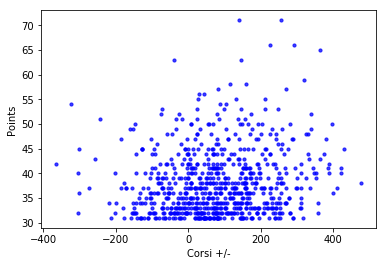

In [94]:
scatterplot(corsi, points, "Corsi +/-", "Points")

This plot is quite crowded and I wish to look at only the top players. I will remove all rows that dont have atleast 30 points.

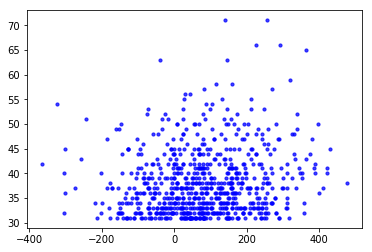

In [42]:
high_points = hockey_data[hockey_data.P > 30]
corsi = high_points['C+/-']
points = high_points['P']
scatterplot(corsi,points)

From looking at this plot you can see a minor linear correlation between a low corsi = low points and high corsi = high points.

Now I wish to use another dataset that only includes top players (good for predicting fantasy players), because I am wondering if this correlation will become more linear.

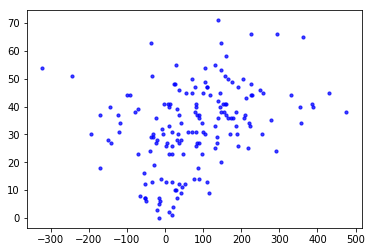

In [46]:
top_player_stats = pd.read_csv('top_players_stats.csv')
points_2 = top_player_stats['P']
corsi_2 = top_player_stats['C+/-']
scatterplot(corsi_2, points_2)

This distribution looks a little more clear so we will stick with this dataset.

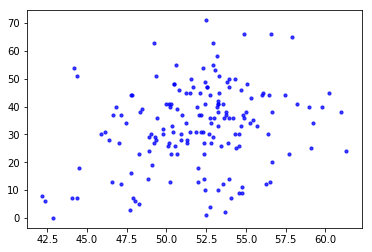

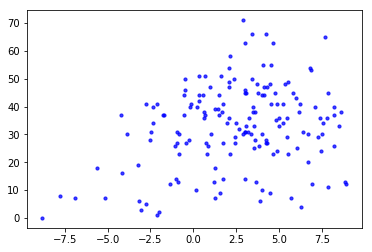

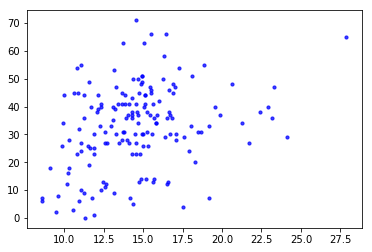

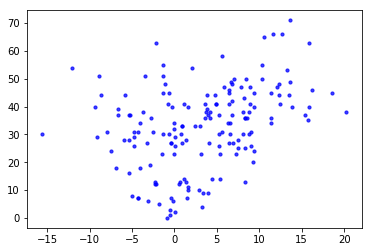

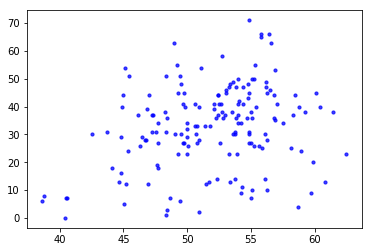

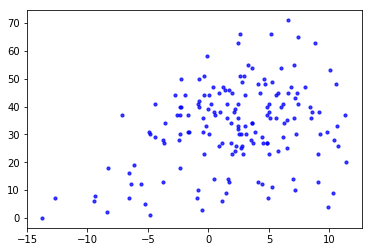

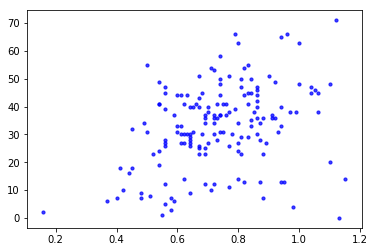

In [47]:
CFp = top_player_stats['CF%']
Rel_CFp = top_player_stats['Rel CF%']
iCFp60 = top_player_stats['iCF/60']
xGpm = top_player_stats['xG+/-']
xGFp = top_player_stats['xGF%']
Rel_xGFp = top_player_stats['Rel xGF%']
ixGFp60 = top_player_stats['ixGF/60']

scatterplot(CFp, points_2)
scatterplot(Rel_CFp, points_2)
scatterplot(iCFp60, points_2)
scatterplot(xGpm, points_2)
scatterplot(xGFp, points_2)
scatterplot(Rel_xGFp, points_2)
scatterplot(ixGFp60, points_2)

In [91]:
def regplots(x_data, y_data, title="", color = "b", yscale_log=False):

    # Get equation for line of best fit.
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data,y_data)
    
    # Create the plot object
    fig, ax = plt.subplots()

    # Plot the data of the points
    ax = sns.regplot(x_data, y_data, label="y={0:.1f}x+{1:.1f}".format(slope,intercept))

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.legend()

1.030838624688169


1.1265688441759498
1.441469158789418


0.7843843887850395
0.8506451253213819


0.9841306596709675
29.940414789354833


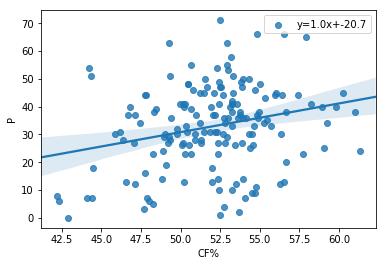

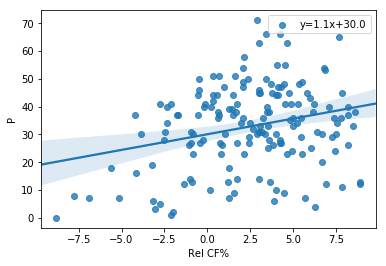

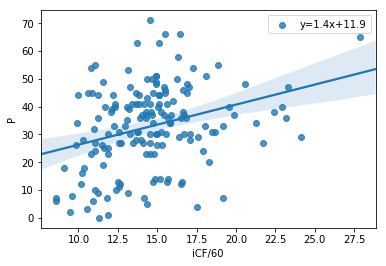

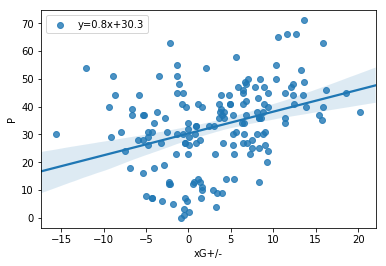

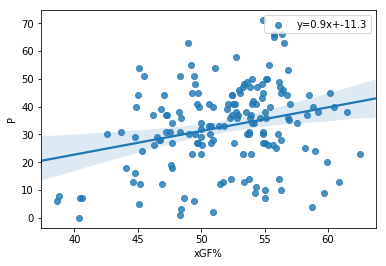

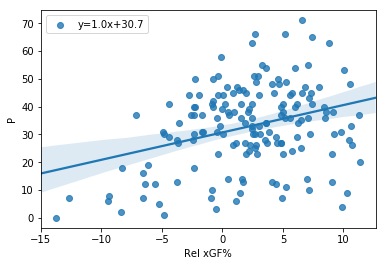

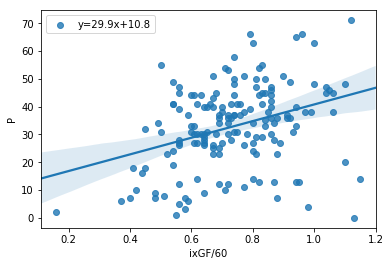

In [90]:
regplots(CFp, points_2)
regplots(Rel_CFp, points_2)
regplots(iCFp60, points_2)
regplots(xGpm, points_2)
regplots(xGFp, points_2)
regplots(Rel_xGFp, points_2)
regplots(ixGFp60, points_2)